In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
## load the historical nfl data
df = pd.read_csv('../data/nfl_data.csv')

In [57]:
## filter the data to include only games where the sportsbook spread was 6
df = df[df['sportsbook_spread'] == 6]
df.shape

(185, 19)

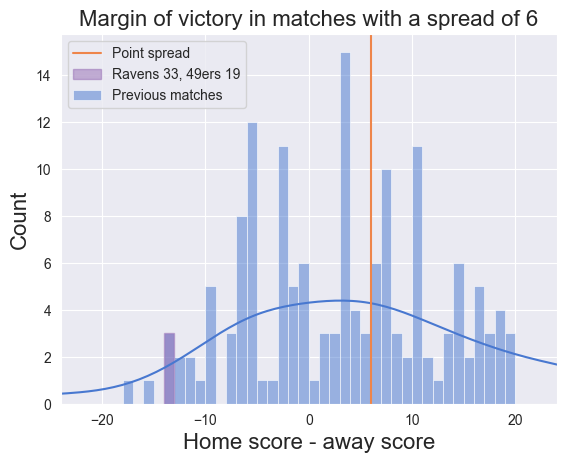

In [58]:
## draw a histogram of the true margin of victory with bins that are 1 unit wide

# esthetic settings
sns.set_style("darkgrid")
colors=sns.color_palette("muted")
fontdict = {'fontsize': 16,
            'weight': 'normal',
            'horizontalalignment': 'center'}
title_str = "Margin of victory in matches with a spread of 6"

# draw the histogram with kde plot overlay
ax = sns.histplot(df['true_margin'],
                  bins=range(-20, 21, 1),
                  kde=True,
                  label='Previous matches',
                  color=colors[0])

## draw a vertical line at 6
plt.axvline(x=6, color=colors[1], label='Point spread')

plt.xlabel("Home score - away score", fontdict=fontdict)
plt.ylabel('Count', fontdict=fontdict)
plt.title(title_str, fontdict=fontdict)
plt.xlim(-24, 24)

# color the bin corresponding to x-axis = -14 a different color
plt.axvspan(-14, -13, ymin=0, ymax=.19, color=colors[4], alpha=0.5, label='Ravens 33, 49ers 19') # got lazy with ymax here
plt.legend(loc='upper left')

# save figure to disk
plt.savefig('spread_6.png', dpi=300)